In [2]:
from config_figures import *
#import plotly.graph_objects as go
#import plotly.offline as pyo

# Range increase / decrease

In [5]:
df = pd.read_csv(google_drive_path + '/sdms_range_size_latitude.csv')


In [35]:
df['rel_change_area'] = (df['current_forest_2071_2100_ssp585_area'] - df['current_forest_1981_2010_area']) / df['current_forest_1981_2010_area'] 
df['rel_change_area'].replace(np.inf, np.nan, inplace=True)

In [36]:
df

,system:index,current_forest_1981_2010_area,current_forest_1981_2010_median_lat,current_forest_2071_2100_ssp585_area,current_forest_2071_2100_ssp585_median_lat,potential_forest_1981_2010_area,potential_forest_1981_2010_median_lat,potential_forest_2071_2100_ssp585_area,potential_forest_2071_2100_ssp585_median_lat,species,.geo,rel_change_area
0,Abarema_barbouriana,9.096341e+11,3.628351,4.842101e+11,2.621221,9.263145e+11,3.628915,4.904854e+11,2.621235,Abarema_barbouriana,"{""type"":""MultiPoint"",""coordinates"":[]}",-0.467687
1,Abarema_brachystachya,5.786399e+11,-20.126733,3.021832e+12,-7.875394,7.833646e+11,-20.127175,3.804831e+12,-9.120498,Abarema_brachystachya,"{""type"":""MultiPoint"",""coordinates"":[]}",4.222301
2,Abarema_cochleata,4.956407e+11,-2.563854,1.934103e+12,-2.374056,5.532732e+11,-2.563878,2.005748e+12,-2.374893,Abarema_cochleata,"{""type"":""MultiPoint"",""coordinates"":[]}",2.902228
3,Abarema_filamentosa,2.078366e+11,-12.685673,4.711402e+11,-23.688510,2.941920e+11,-12.438045,7.233960e+11,-23.437187,Abarema_filamentosa,"{""type"":""MultiPoint"",""coordinates"":[]}",1.266878
4,Abarema_jupunba,2.844089e+12,2.124979,3.126064e+12,-0.127611,2.995707e+12,2.125002,3.220474e+12,0.123528,Abarema_jupunba,"{""type"":""MultiPoint"",""coordinates"":[]}",0.099144
...,...,...,...,...,...,...,...,...,...,...,...,...
10585,Zygia_latifolia,4.031509e+12,-0.629530,4.714207e+12,-1.744671,4.468974e+12,-0.876578,5.287140e+12,-2.250724,Zygia_latifolia,"{""type"":""MultiPoint"",""coordinates"":[]}",0.169341
10586,Zygia_longifolia,1.201255e+12,5.378184,8.744748e+11,5.131786,1.285813e+12,5.378167,9.244954e+11,5.372967,Zygia_longifolia,"{""type"":""MultiPoint"",""coordinates"":[]}",-0.272032
10587,Zygia_racemosa,1.932164e+12,0.374229,4.182478e+12,-2.875296,1.976388e+12,0.374183,4.258215e+12,-2.625558,Zygia_racemosa,"{""type"":""MultiPoint"",""coordinates"":[]}",1.164660
10588,Zygia_unifoliolata,2.499144e+12,-1.373668,6.292484e+12,-2.625083,2.772364e+12,-0.875010,6.671624e+12,-2.375201,Zygia_unifoliolata,"{""type"":""MultiPoint"",""coordinates"":[]}",1.517856


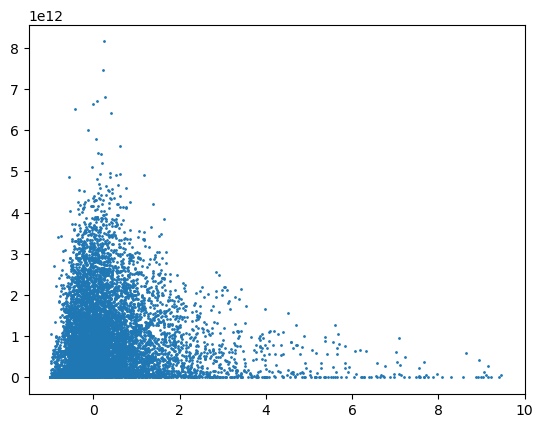

In [44]:
plt.scatter(x = df['rel_change_area'], y = df['current_forest_1981_2010_area'], s = 1)
plt.xlim(-1.5,10)
plt.show()

In [34]:
print(df[df['rel_change_area'] > 1].shape )
print(df[df['rel_change_area'] < 1].shape )

(6170, 12)
(4407, 12)


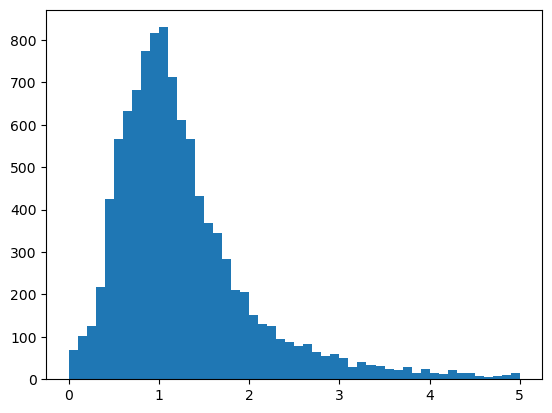

In [32]:
plt.hist(df['rel_change_area'], 50, range = [0, 5])
plt.show()

# Spider plots

In [39]:
df_dict = {}
df_median_list = []
for biome in [6, 3, 5, 2, 4]:
    print(f'Checking file for biome {biome}')
    filename = google_drive_path + '/ecoregions_species_stats_v2_biome_' + str(biome) + '.csv' 
    #filename = google_drive_path + '/ecoregions_species_numbers_biome_' + str(biome) + '.csv'
    df = pd.read_csv(filename)
    print(df.shape)

    assert len(df.BIOME_NAME.unique()) == 1 & len(df.BIOME_NUM.unique()) == 1
    assert len([(ecoid, df[df.ECO_ID == ecoid].shape[0]) for ecoid in df.ECO_ID.unique() if df[df.ECO_ID == ecoid].shape[0] != 1]) == 0

    # remove rows for ecoregions with no species, ie. n_present = n_future = 0
    df = df[~(df[['n_future','n_present']] == 0).all(axis=1)]
    print(df.shape)

    df['median_rel_area'] = (df.median_area_change + 1) #0 = full loss, 1 = no change, 2 = 100% increase
    df['turnover'] = (1- ((df.n_present - df.n_lost) / (df.n_present + df.n_gained))) * 100 # (1 - Jaccard_index) * 100
    df['median_area_present_1e9'] = df.median_area_present / 1e9
    df['median_area_future_1e9'] = df.median_area_future / 1e9
    df['ECO_AREA_1e9'] = df.ECO_AREA / 1e9
    #df['species_area_rel_change'] = df.species_median_area_future / df.species_median_area_present * 100
    #df['species_median_area_rel_present'] = df.species_median_area_present / df.ECO_AREA #* 1e9
    #df['species_median_area_rel_future'] = df.species_median_area_future / df.ECO_AREA #* 1e9
    df_dict[df['BIOME_NAME'][0]] = df.drop(['system:index','BIOME_NAME','BIOME_NUM','REALM','.geo'], axis=1)

    df_m = pd.DataFrame(df.drop(['system:index', 'BIOME_NUM', 'ECO_ID'], axis=1).median(axis=0, numeric_only=True), columns = [df.BIOME_NAME[0]]).transpose()
    df_median_list.append(df_m)

df_median = pd.concat(df_median_list) 
df_median

Checking file for biome 6
(26, 15)
(26, 15)
Checking file for biome 3
(15, 15)
(14, 15)
Checking file for biome 5
(47, 15)
(47, 15)
Checking file for biome 2
(56, 15)
(55, 15)
Checking file for biome 4
(83, 15)
(83, 15)


,ECO_AREA,median_area_change,median_area_future,median_area_present,n_future,n_gained,n_lost,n_present,median_rel_area,turnover,median_area_present_1e9,median_area_future_1e9,ECO_AREA_1e9
Boreal Forests/Taiga,3.166265e+11,9.630173,7.569979e+09,2.168168e+09,106.0,47.0,1.0,48.0,10.630173,46.076172,2.168168,7.569979,316.626535
Tropical & Subtropical Coniferous Forests,1.292708e+10,-0.483744,1.793759e+09,1.460946e+09,1395.0,43.5,77.5,1472.0,0.516256,12.108680,1.460946,1.793759,12.927084
Temperate Conifer Forests,5.325400e+10,2.275407,3.466051e+09,1.806921e+09,273.0,51.0,11.0,210.0,3.275407,28.020566,1.806921,3.466051,53.254001
Tropical & Subtropical Dry Broadleaf Forests,3.490217e+10,-0.660310,1.358050e+09,1.211815e+09,1045.0,30.0,179.0,1352.0,0.339690,16.129032,1.211815,1.358050,34.902167
Temperate Broadleaf & Mixed Forests,9.343459e+10,0.643401,8.688147e+09,8.021807e+09,238.0,24.0,16.0,194.0,1.643401,19.519095,8.021807,8.688147,93.434586


In [40]:
# normalize by the maximum value to rescale to values from 0 to max for each column
df_norm = df_median / df_median.max()
# min-max normalisation
#df_norm = (df_median - df_median.min()) / (df_median.max() - df_median.min())
df_norm

,ECO_AREA,median_area_change,median_area_future,median_area_present,n_future,n_gained,n_lost,n_present,median_rel_area,turnover,median_area_present_1e9,median_area_future_1e9,ECO_AREA_1e9
Boreal Forests/Taiga,1.000000,1.000000,0.871300,0.270284,0.075986,0.921569,0.005587,0.032609,1.000000,1.000000,0.270284,0.871300,1.000000
Tropical & Subtropical Coniferous Forests,0.040828,-0.050232,0.206460,0.182122,1.000000,0.852941,0.432961,1.000000,0.048565,0.262797,0.182122,0.206460,0.040828
Temperate Conifer Forests,0.168192,0.236279,0.398940,0.225251,0.195699,1.000000,0.061453,0.142663,0.308124,0.608136,0.225251,0.398940,0.168192
Tropical & Subtropical Dry Broadleaf Forests,0.110231,-0.068567,0.156311,0.151065,0.749104,0.588235,1.000000,0.918478,0.031955,0.350051,0.151065,0.156311,0.110231
Temperate Broadleaf & Mixed Forests,0.295094,0.066811,1.000000,1.000000,0.170609,0.470588,0.089385,0.131793,0.154598,0.423627,1.000000,1.000000,0.295094


In [41]:
categories = ['turnover', 'n_present', 'ECO_AREA_1e9', 'median_area_present_1e9', 'median_rel_area']
categories = [*categories, categories[0]]
print(categories)

#category_labels = [c + ' [' + str(int(df_median.min()[c])) +  ', ' + str(int(df_median.max()[c])) + ']' for c in categories]
category_labels = [c + ' [0, ' + str(int(df_median.max()[c])) + ']' for c in categories]
category_labels

['turnover', 'n_present', 'ECO_AREA_1e9', 'median_area_present_1e9', 'median_rel_area', 'turnover']


['turnover [0, 46]',
 'n_present [0, 1472]',
 'ECO_AREA_1e9 [0, 316]',
 'median_area_present_1e9 [0, 8]',
 'median_rel_area [0, 10]',
 'turnover [0, 46]']

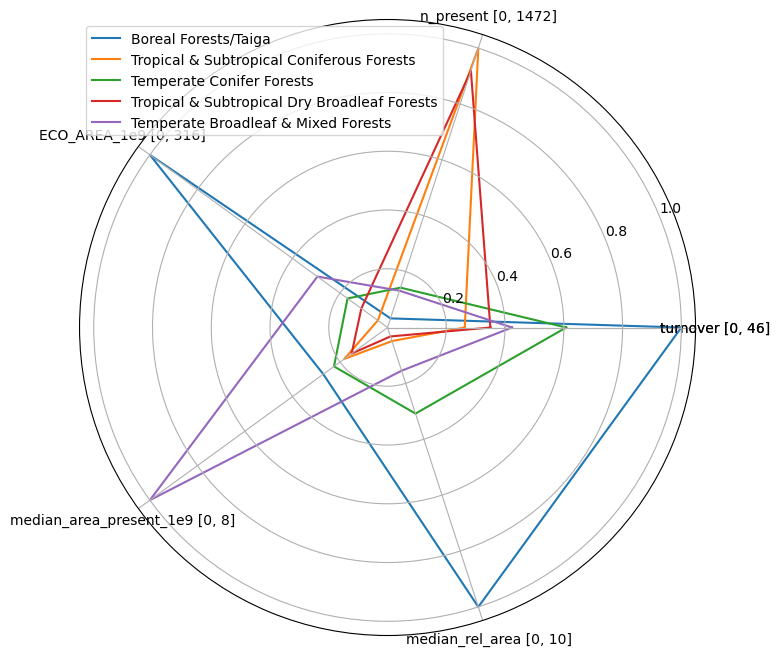

In [42]:
def spider_plot(df_line, label_loc):
    line_list = list(df_line[1][categories])
    plt.plot(label_loc, line_list, label=df_line[0], zorder=1)
    

df_lines = [l for l in df_norm.iterrows()]
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(categories))

plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
[spider_plot(l, label_loc) for l in df_norm.iterrows()]
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=category_labels)
plt.legend()
plt.show()

In [47]:
label_loc.shape


(6,)

0 Boreal Forests/Taiga
1 Tropical & Subtropical Coniferous Forests
2 Temperate Conifer Forests
3 Tropical & Subtropical Dry Broadleaf Forests
4 Temperate Broadleaf & Mixed Forests


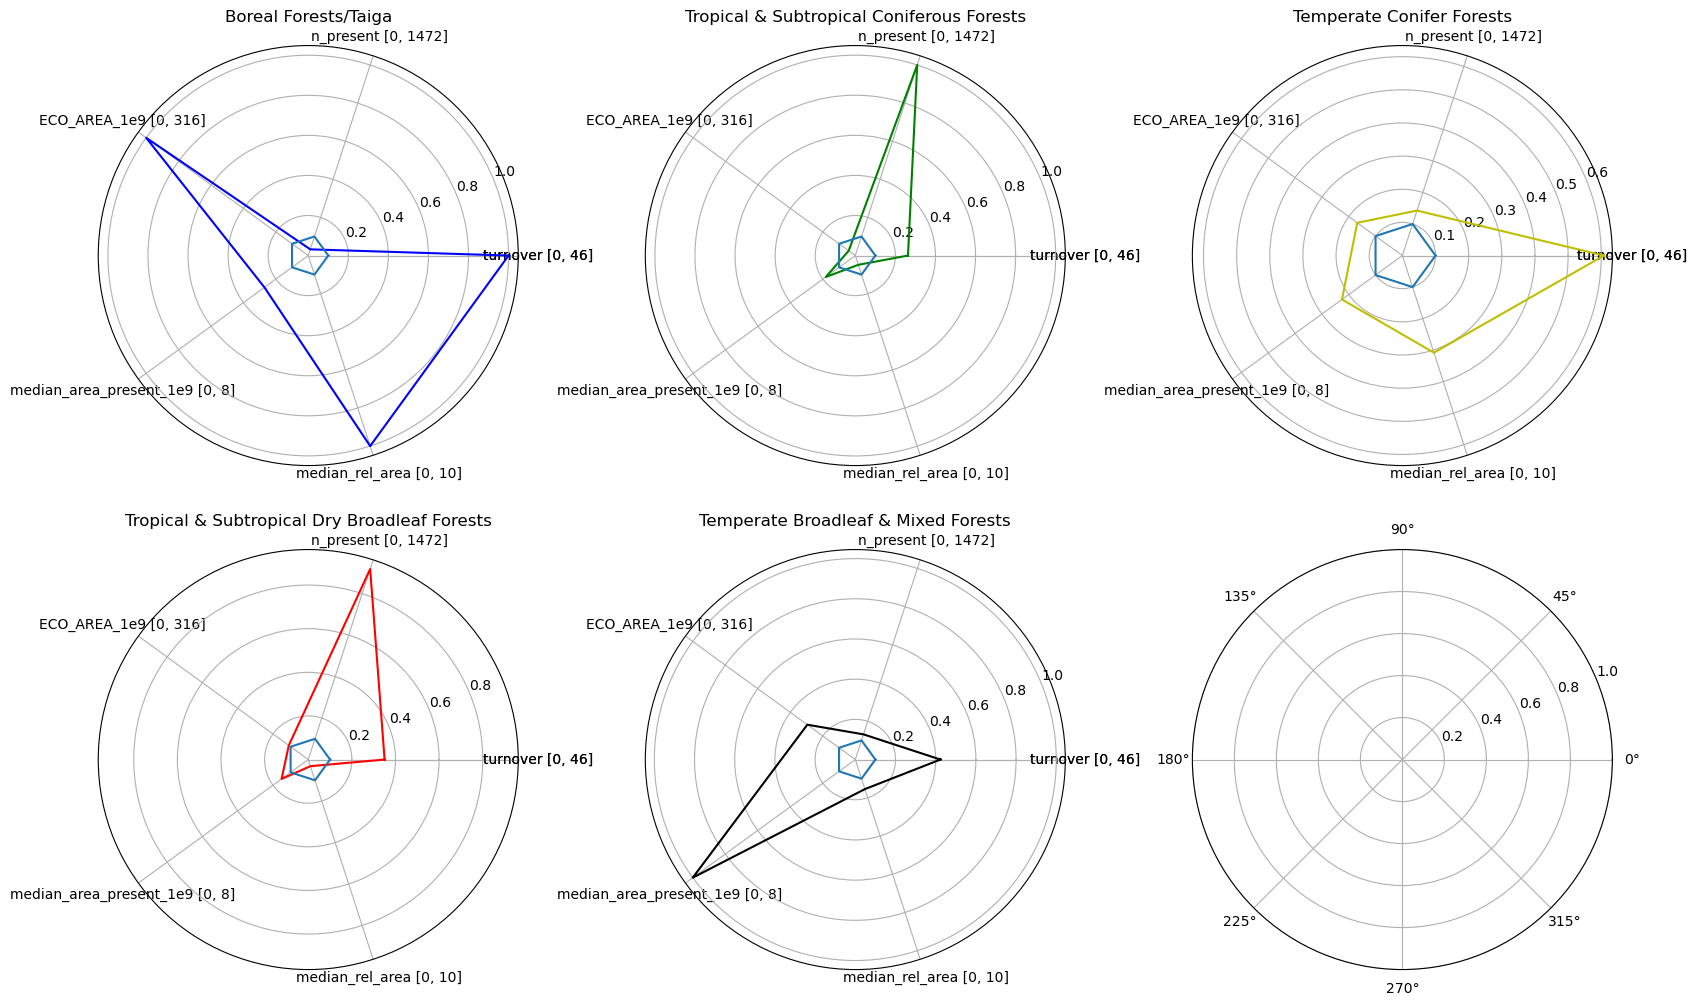

In [90]:
df_lines = [l for l in df_norm.iterrows()]
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(categories))
colors = ['b','g','y','r', 'k']
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20,12), subplot_kw=dict(projection='polar'))#, constrained_layout=True)#, layout='constrained')

for i, ax in enumerate(axs.flat):
    if i < len(df_lines):
        df_line = df_lines[i]
        print(i, df_line[0])

        #eco_df = df_dict[df_line[0]][categories]
        #ax.plot(np.repeat(label_loc, eco_df.shape[0]), np.array(eco_df).flatten(), 'o', c=colors[i])

        ax.plot(label_loc, list(df_line[1][categories]), label=df_line[0], c=colors[i])
        #ax.plot(label_loc, np.repeat(0.1, len(label_loc)))

        ax.set_thetagrids(np.degrees(label_loc), labels=category_labels)
        ax.set_title(df_line[0])
        #ax.legend()


In [62]:
np.repeat(label_loc, 10).shape

(60,)

In [72]:
i = 0
print(df_lines[i][0])
df = df_dict[df_lines[i][0]][categories][0:3]
print(df.shape)
print(np.array(df).flatten().shape)
print(np.repeat(label_loc, df.shape[0]).shape)

Boreal Forests/Taiga
(3, 6)
(18,)
(18,)


In [73]:
df

,turnover,n_present,ECO_AREA_1e9,median_area_present_1e9,median_rel_area,turnover
0,10.416667,45,48.871858,4.741485,1.585054,10.416667
1,45.378151,134,465.718799,3.065909,175.159024,45.378151
2,70.945946,43,757.977060,1.226011,26.022587,70.945946


In [74]:
np.array(df).flatten()

array([ 10.41666667,  45.        ,  48.87185843,   4.74148503,
         1.58505372,  10.41666667,  45.37815126, 134.        ,
       465.71879943,   3.06590937, 175.15902424,  45.37815126,
        70.94594595,  43.        , 757.97706027,   1.2260115 ,
        26.02258728,  70.94594595])

In [75]:
np.repeat(label_loc, df.shape[0])

array([0.        , 0.        , 0.        , 1.25663706, 1.25663706,
       1.25663706, 2.51327412, 2.51327412, 2.51327412, 3.76991118,
       3.76991118, 3.76991118, 5.02654825, 5.02654825, 5.02654825,
       6.28318531, 6.28318531, 6.28318531])